# Frequencies Spectra for Individual Particles

In [1]:
import numpy as np
import math
import pandas as pd
import trackpy as tp
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

In [2]:
roi_size = 20.0
roi_center_x = 776.0
roi_center_y = 597.0
fps = 99.0

In [3]:
#folderPath = r'G:\My Drive\workAppState\prj_shocks\expData\data_phonon_spectrum\data_set1\analyzed\103Vbias\20230727spectra\04_an_frequenciesSpectra'
#folderPath = r'g:\My Drive\workAppState\prj_shocks\expData\data_phonon_spectrum\data_set1\analyzed\103Vbias\20230822spectra\04_an_frequenciesSpectra'
folderPath = r'G:\My Drive\workAppState\prj_shocks\expData\data_phonon_spectrum\data_set1\analyzed\110Vbias\20230822spectra\04_an_frequenciesSpectra'

In [4]:
#pos_filepath = folderPath + r'\inputs' + r'\position_noTiff.txt'
#pos_filepath = folderPath + r'\inputs' + r'\position_103V_20230822NoTiff.txt'
pos_filepath = folderPath + r'\inputs' + r'\position_110V_20230823NoTiff.txt'

In [5]:
col_names = [r'particle_notrack',r'frame',r'x',r'y']

In [6]:
df_pos = pd.read_csv(pos_filepath, header = None, names = col_names)

In [7]:
df_pos.head()

,particle_notrack,frame,x,y
0,1,0,830.191,372.608
1,2,0,894.870,373.498
2,3,0,876.190,375.247
3,4,0,806.928,376.214
4,5,0,862.897,377.384


In [8]:
#cacluate CM of particle cloud for each frame:

In [9]:
df_cm = df_pos.groupby('frame')[['x','y']].mean().reset_index()
df_cm.columns = ['frame', 'x_CM', 'y_CM']

In [10]:
df_pos = df_pos.merge(df_cm, on = 'frame', how = 'left')
df_pos.head()

,particle_notrack,frame,x,y,x_CM,y_CM
0,1,0,830.191,372.608,833.575668,602.847062
1,2,0,894.870,373.498,833.575668,602.847062
2,3,0,876.190,375.247,833.575668,602.847062
3,4,0,806.928,376.214,833.575668,602.847062
4,5,0,862.897,377.384,833.575668,602.847062


In [11]:
df_linked = tp.link(df_pos, 5.0, memory = 0)

Frame 763: 2569 trajectories present.


In [12]:
df_linked.head()

,particle_notrack,frame,x,y,x_CM,y_CM,particle
0,1,0,830.191,372.608,833.575668,602.847062,0
1721,1722,0,704.216,652.823,833.575668,602.847062,1
1722,1723,0,776.039,652.929,833.575668,602.847062,2
1723,1724,0,797.732,653.297,833.575668,602.847062,3
1724,1725,0,893.063,652.280,833.575668,602.847062,4


In [15]:
df_oneframe_check = df_pos[df_pos['frame'] == 333]

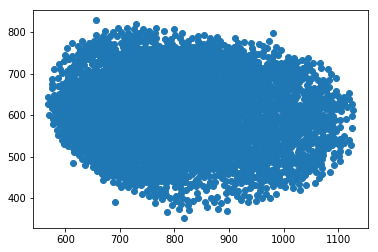

In [16]:
fig, ax = plt.subplots()
ax.scatter(df_oneframe_check['x'], df_oneframe_check['y'])

In [17]:
roi_condition = ((df_linked['x'] < roi_center_x + roi_size) &
                 (df_linked['y'] < roi_center_y + roi_size) & 
                 (df_linked['y'] > roi_center_y - roi_size) & 
                 (df_linked['y'] > roi_center_y - roi_size))

In [18]:
df_roi = df_linked[roi_condition]

In [19]:
df_roi.size

803054

In [20]:
df_linked.size

13723549

In [21]:
particles_listing = np.unique(df_roi['particle'])

In [22]:
type(particles_listing)

numpy.ndarray

In [23]:
particles_listing

array([  324,   325,   326,   327,   331,   335,   342,   344,   345,
         352,   353,   354,   355,   356,   357,   360,   364,   374,
         384,   385,   393,   398,   401,   403,   412,   413,   414,
         415,   416,   417,   418,   419,   421,   423,   430,   431,
         432,   433,   434,   435,   436,   441,   445,   446,   453,
         454,   461,   463,   464,   470,   471,   472,   473,   479,
         480,   481,   568,  1294,  1725,  1943,  1944,  1945,  1946,
        1947,  1950,  1951,  1956,  1957,  1959,  1961,  1963,  1964,
        1965,  1966,  1969,  1970,  1971,  1989,  1991,  1992,  1997,
        1998,  1999,  2000,  2001,  2002,  2005,  2006,  2007,  2010,
        2011,  2012,  2018,  2019,  2020,  2021,  2024,  2034,  2035,
        2036,  2040,  2051,  2064,  2065,  2066,  2072,  2074,  2080,
        2084,  2093,  2098,  2103,  2105,  2106,  2107,  2112,  2113,
        2114,  2120,  2121,  2122,  2123,  2125,  2126,  2133,  2134,
        2135,  2141,

In [25]:
len(particles_listing)

338

In [26]:
traj_test = df_roi[df_roi['particle'] == 113]

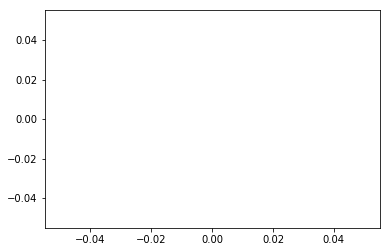

In [27]:
fig, ax = plt.subplots()
ax.plot(traj_test['x'], traj_test['y'])


In [28]:
arr_traj_lengths = np.empty(len(particles_listing))

In [29]:
for i in range(0, len(particles_listing)):
    cur_len = len(df_roi[df_roi['particle'] == particles_listing[i]])
    arr_traj_lengths[i] = cur_len
               

In [30]:
np.max(arr_traj_lengths)

764.0

In [31]:
pd_traj_len = pd.DataFrame({'particle':particles_listing, 'tr_len':arr_traj_lengths})

In [32]:
pd_traj_len.head()

,particle,tr_len
0,324,669.0
1,325,5.0
2,326,409.0
3,327,764.0
4,331,32.0


In [33]:
pd_traj_len.sort_values(by = 'tr_len', ascending = False, inplace = True)

In [34]:
pd_traj_len.head(20)

,particle,tr_len
169,2245,764.0
57,1294,764.0
85,2002,764.0
84,2001,764.0
135,2159,764.0
136,2161,764.0
81,1998,764.0
80,1997,764.0
79,1992,764.0
78,1991,764.0


In [35]:
traj_test = df_roi[df_roi['particle'] == 2245].copy()
N = len(traj_test['x'])

In [36]:
traj_test['x_rfcm'] = traj_test['x'] - traj_test['x_CM'] 
traj_test['y_rfcm'] = traj_test['y'] - traj_test['y_CM'] 
traj_test.head()

,particle_notrack,frame,x,y,x_CM,y_CM,particle,x_rfcm,y_rfcm
1191,1192,0,790.717,593.505,833.575668,602.847062,2245,-42.858668,-9.342062
3767,3768,1,791.160,593.862,832.434116,603.095822,2245,-41.274116,-9.233822
6333,6334,2,791.488,593.830,832.774982,603.604313,2245,-41.286982,-9.774313
8906,8907,3,791.419,593.545,832.252417,603.155142,2245,-40.833417,-9.610142
11464,11465,4,791.211,592.895,832.759696,603.364106,2245,-41.548696,-10.469106


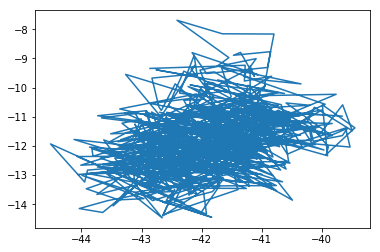

In [37]:

fig, ax = plt.subplots()
ax.plot(traj_test['x_rfcm'], traj_test['y_rfcm'])

In [38]:
def get_spectrum_drift(arr_t, arr_sig):
    slope, intercept = np.polyfit(arr_t, arr_sig, 1)
    arr_sig_nodrift = arr_sig - (slope * arr_t + intercept)
    arr_intens = np.fft.fft(arr_sig_nodrift)
    dt = arr_t[1] - arr_t[0]
    N = len(arr_t)
    print(N)
    arr_freqs = np.fft.fftfreq(N, dt)[:N//2]    
    return arr_freqs, arr_intens

In [39]:
def get_spectrum(arr_t, arr_sig):
    arr_sig_nomean = arr_sig - np.mean(arr_sig)
    arr_intens = np.fft.fft(arr_sig_nomean)
    dt = arr_t[1] - arr_t[0]
    N = len(arr_t)
    arr_freqs = np.fft.fftfreq(N, dt)[:N//2]    
    return arr_freqs, arr_intens

In [40]:
arr_p = np.array(pd_traj_len['particle'])

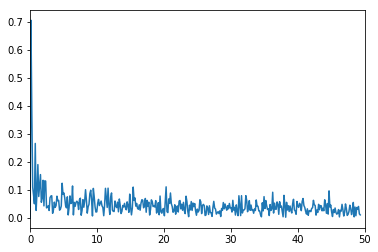

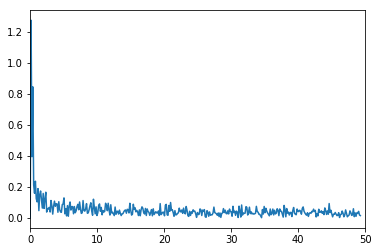

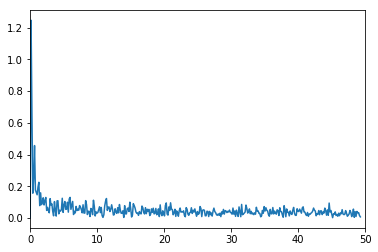

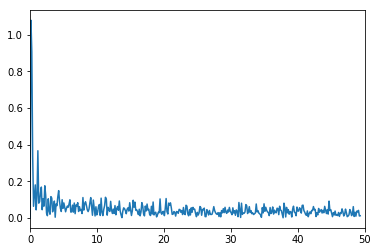

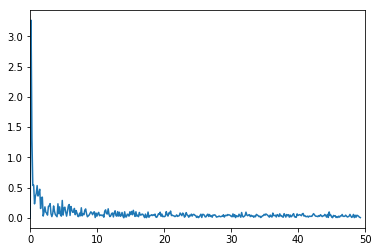

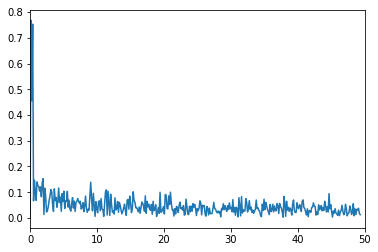

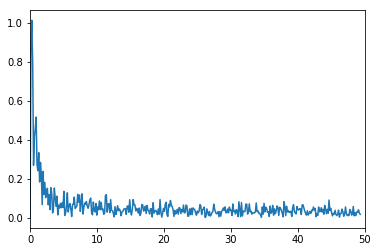

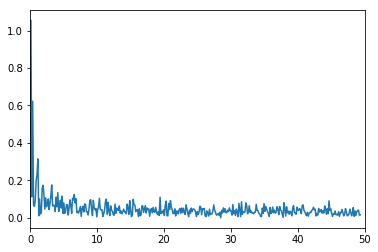

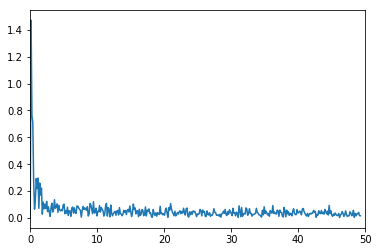

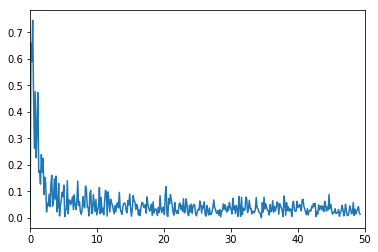

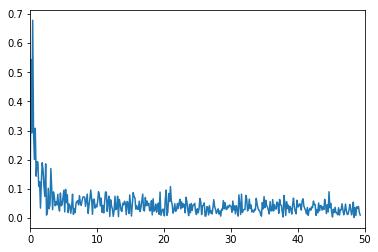

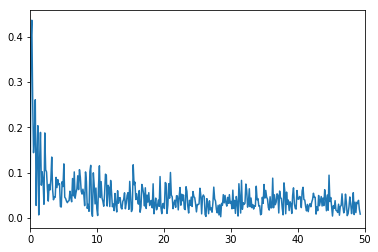

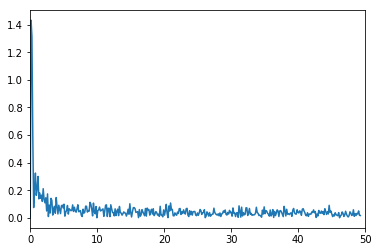

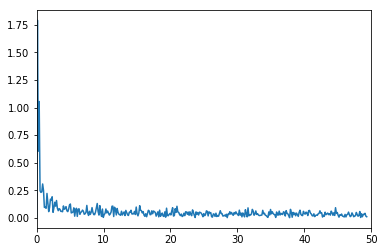

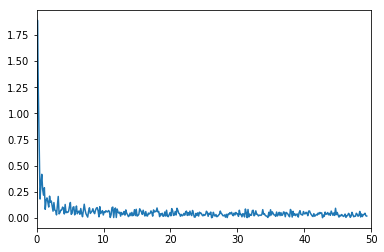

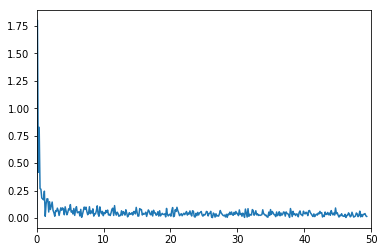

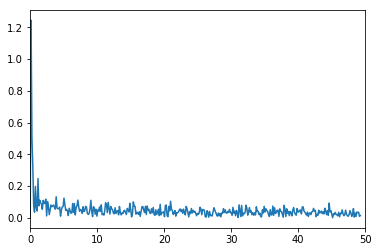

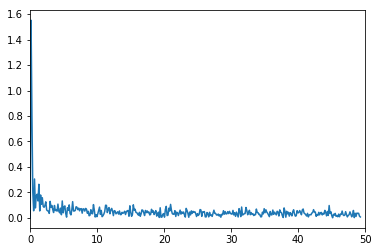

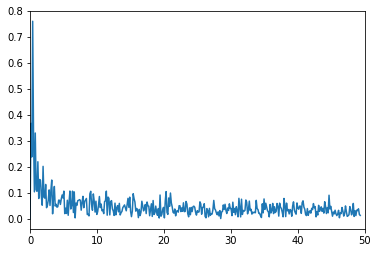

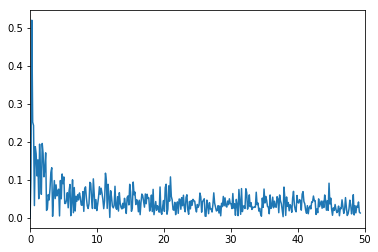

In [41]:
for i in range(0,20):
    traj_i = df_roi[df_roi['particle'] == arr_p[i]].copy()
    N = len(traj_i['x'])
    traj_i['x_rfcm'] = traj_i['x'] - traj_i['x_CM']
    traj_i['y_rfcm'] = traj_i['y'] - traj_i['y_CM']
    arr_time_i = np.linspace(0.0, 1.0 / fps * N, N)
    arr_freqs_i, arr_intens_i = get_spectrum(arr_time_i, traj_i['x_rfcm'])
    fig_i, ax_i = plt.subplots()
    ax_i.set_xlim(0, 50)
    arr_abs_intens = 2.0 / N * np.abs(arr_intens_i[0:N//2])
    arr_savg = savgol_filter(arr_abs_intens, 3, 2)
    ax_i.plot(arr_freqs_i, arr_savg)
    
    

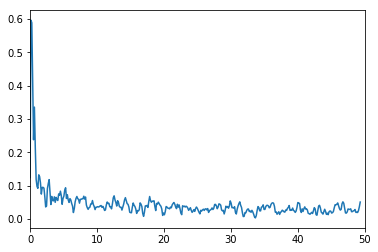

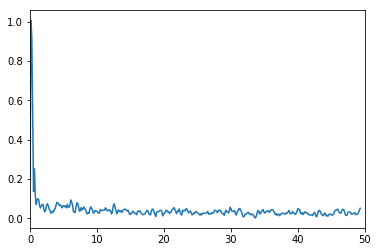

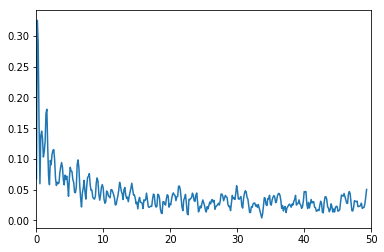

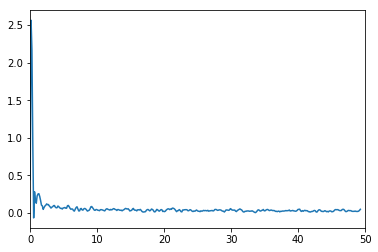

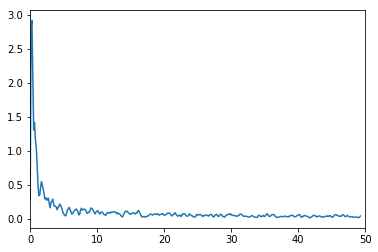

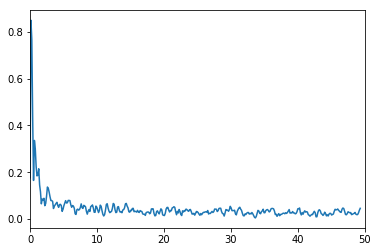

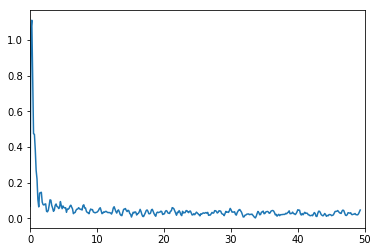

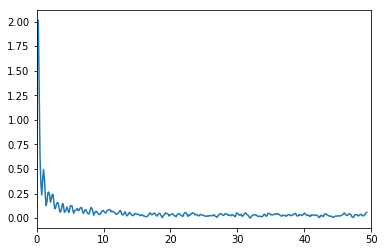

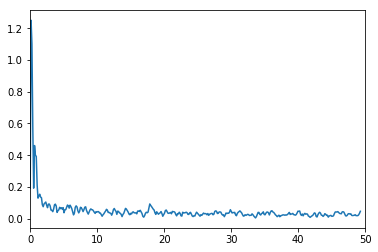

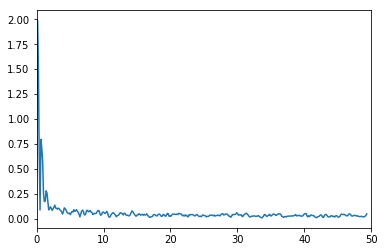

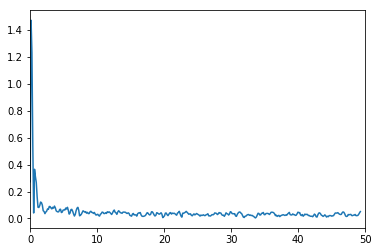

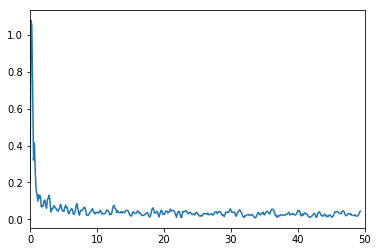

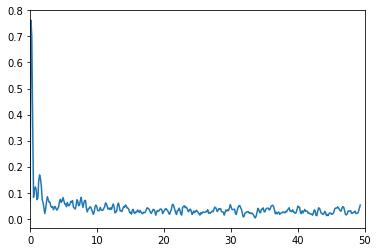

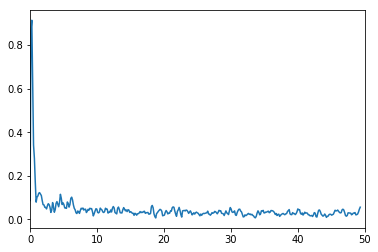

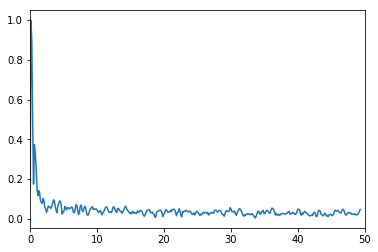

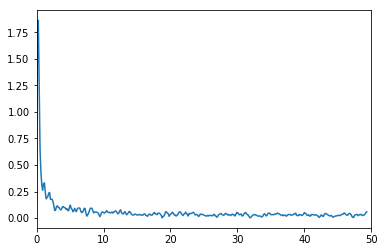

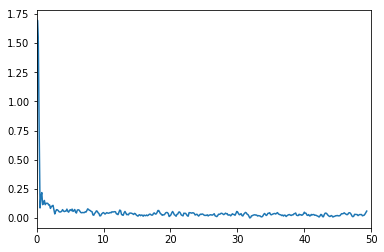

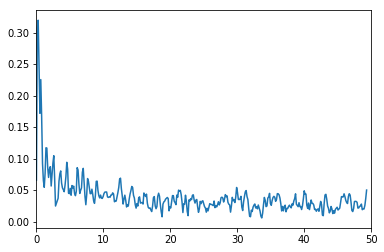

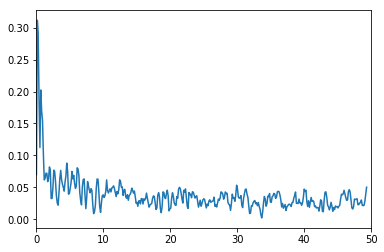

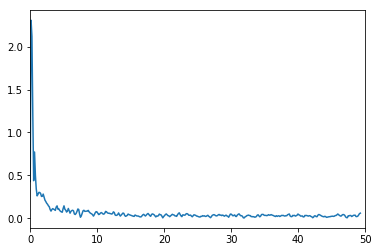

In [42]:
for i in range(0,20):
    traj_i = df_roi[df_roi['particle'] == arr_p[i]].copy()
    N = len(traj_i['x'])
    traj_i['x_rfcm'] = traj_i['x'] - traj_i['x_CM']
    traj_i['y_rfcm'] = traj_i['y'] - traj_i['y_CM']
    arr_time_i = np.linspace(0.0, 1.0 / fps * N, N)
    arr_freqs_i, arr_intens_i = get_spectrum(arr_time_i, traj_i['y_rfcm'])
    fig_i, ax_i = plt.subplots()
    ax_i.set_xlim(0, 50)
    arr_abs_intens = 2.0 / N * np.abs(arr_intens_i[0:N//2])
    arr_savg = savgol_filter(arr_abs_intens, 9, 4)
    ax_i.plot(arr_freqs_i, arr_savg)